In [57]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
initial_data = yf.download("MSFT", start="2020-10-01", end="2021-10-01") # downlading the data from yahoo finacne

[*********************100%***********************]  1 of 1 completed


In [6]:
initial_data.head()#showing the first 5 data information

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,207.729996,211.979996,206.539993,210.330002,208.036972,33829100
2020-10-01,213.490005,213.990005,211.320007,212.460007,210.143738,27158400
2020-10-02,208.000000,210.990005,205.539993,206.190002,203.942078,33154800
2020-10-05,207.220001,210.410004,206.979996,210.380005,208.086426,21331600
2020-10-06,208.820007,210.179993,204.820007,205.910004,203.665131,28554300


In [7]:
initial_data[['Adj Close']].head()

,Adj Close
Date,
2020-09-30,208.036972
2020-10-01,210.143738
2020-10-02,203.942078
2020-10-05,208.086426
2020-10-06,203.665131


In [9]:
data =  initial_data[['Adj Close']]
data.head()

,Adj Close
Date,
2020-09-30,208.036972
2020-10-01,210.143738
2020-10-02,203.942078
2020-10-05,208.086426
2020-10-06,203.665131


In [11]:
data.describe().round(2)   #showig data description

,Adj Close
count,253.00
mean,246.61
std,30.19
min,200.12
25%,218.45
50%,242.21
75%,270.59
max,304.66


array([<AxesSubplot:xlabel='Date'>], dtype=object)

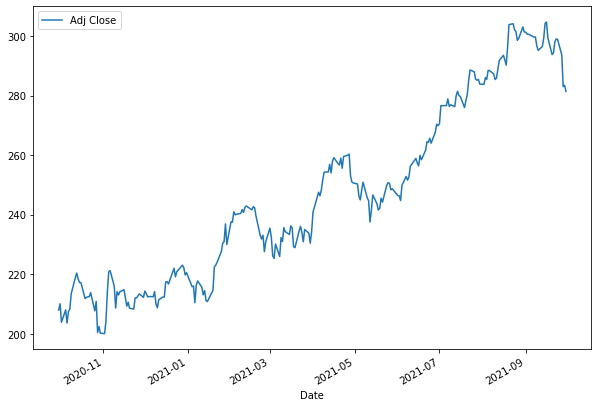

In [55]:
data.plot(figsize=(10, 7), subplots=True) #plotting the movement of the stock

In [111]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1)) #calculating the volaltilty of the stock

In [114]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 1.39 %


In [14]:
vol = np.sqrt(252) * log_return.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 22.04 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

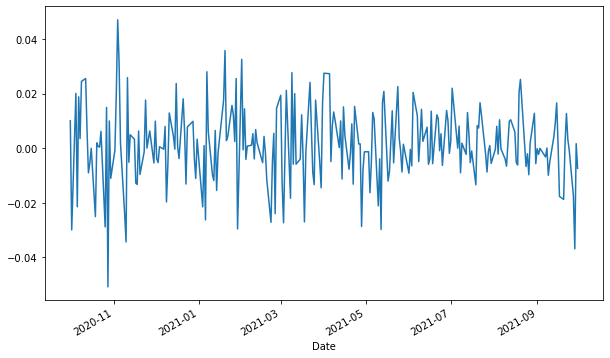

In [141]:
log_return.dropna(inplace=True) #volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [137]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 17.83 %


In [138]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility   

The first six months volatility is 25.68 %


# Question 2 
Methodology 


# Binomial Tree
This involves using an iterative approach utilizing multiple steps to value options prices.
The model is based on the assumption that that there is a risk neutral environment, the interest rates are constant and the price of the underlying assets takes two values; goes up or goes down

In [20]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  # getting the spot price

The spot price is 281.41


In [107]:
S0 = 281              # spot stock price
K = 286               # strike price
T = 1.0                 # time to maturity 
r = 0.0155                 # risk free rate 
sig = 0.2204               # annaulised volatility
N = 5                   # number of time steps of the tree
payoff = "call"          # payoff 

In [108]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u   

In [82]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [84]:
S

array([[281.        , 310.10797577, 342.23116242, 377.68189688,
        416.80487021, 459.98047898],
       [  0.        , 254.62421533, 281.        , 310.10797577,
        342.23116242, 377.68189688],
       [  0.        ,   0.        , 230.72416738, 254.62421533,
        281.        , 310.10797577],
       [  0.        ,   0.        ,   0.        , 209.06747359,
        230.72416738, 254.62421533],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        189.44356375, 209.06747359],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 171.66163263]])

In [109]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # probability of the price of underlying asset going up
q = 1.0 - p           # probability of the price of underlying asset going down
p

0.4911029110437897

In [86]:
q

0.5088970889562103

In [87]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 173.98047898],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  91.68189688],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  24.10797577],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [88]:
# for European call Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 25.53599021,  40.75156367,  62.97544009,  93.4496113 ,
        131.6900974 , 173.98047898],
       [  0.        ,  11.00824346,  19.55339852,  33.9510504 ,
         57.1163896 ,  91.68189688],
       [  0.        ,   0.        ,   2.8290416 ,   5.77847365,
         11.80285147,  24.10797577],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [89]:
print('European ' + payoff, str( V[0,0]))

European call 25.535990205397614


# Monte Carlo Simulation
This is a method used to calculate the value of an option by simulating the random walk and generating a sequence of random numbers showing the future value of the stock based on which we calculate the future value of the option.

In [50]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [51]:
T = 1
r = 0.0155
sigma = 0.2204
S0 = 281
K = 286

In [52]:
S = mcs_simulation_np(10000)    #number of simulations

In [33]:
S = np.transpose(S)
S

array([[281.        , 280.32323171, 280.01458905, ..., 265.08766145,
        264.39194549, 264.53192701],
       [281.        , 281.78966443, 281.80358851, ..., 239.14482248,
        238.80192137, 239.18455841],
       [281.        , 281.54524887, 282.15152117, ..., 200.56045308,
        200.22453499, 200.07870524],
       ...,
       [281.        , 281.14664923, 281.4450396 , ..., 269.97196135,
        269.24495346, 269.30347773],
       [281.        , 280.8911238 , 280.97534245, ..., 213.71964204,
        214.62777785, 214.40400698],
       [281.        , 280.86125319, 281.00570293, ..., 348.71569932,
        348.12493843, 348.8415493 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

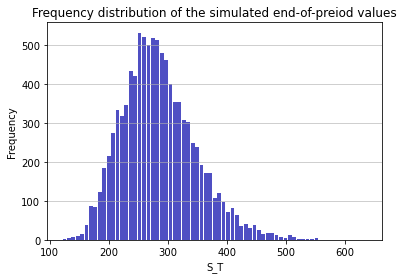

In [34]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [35]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 25.26260138533631


# Greeks
Greeks measure the sensitivity of the price of a derivative with respect to a certain risk factor: e.g., the underlying asset S, the interest rates, the volatility, the time, etc.

# Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the price of the underlying asset. Delta is the first derivative of the value of the option with respect to the price of the underlying asset

In [58]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [59]:
delta(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call') # value of delta

0.5225659176495471

In [77]:
S = np.linspace(180, 370, 21) #plotting the 3d graph of delta
T = np.linspace(0.5, 2, 21)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 286, T[i], 0.0155, 0.0075, 0.2204, 'call')



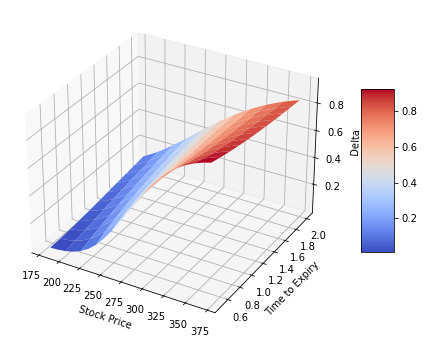

In [78]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [62]:
S = np.linspace(180,370,11)  #plotting the 2d graph 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 286, 1, 0.0155, 0.0075, 0.2204, 'call')
    

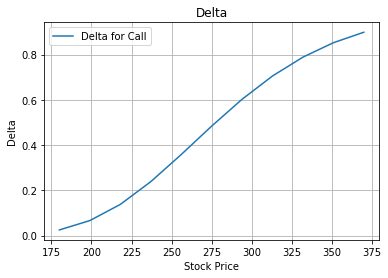

In [63]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [26]:
d = delta(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5226 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5226 .


# Gamma
Gamma, Γ, measures the rate of change in delta with respect to changes in the underlying price. Gamma is the option price second derivative with respect to its underlying price.

In [64]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [65]:
gamma(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call') #value of delta 

0.006379335006857433

In [75]:
S = np.linspace(180, 370, 21) #plotting the 3d graph
T = np.linspace(0.5, 2, 21)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 286, T[i], 0.0155, 0.0075, 0.2204, 'call')

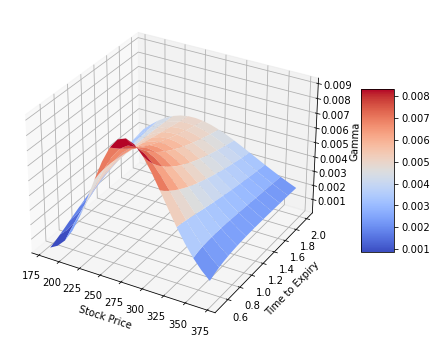

In [76]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [73]:
S = np.linspace(180,370,11) #plotting the 2d graph
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 286, 1, 0.0155, 0.0075, 0.2204, 'call')

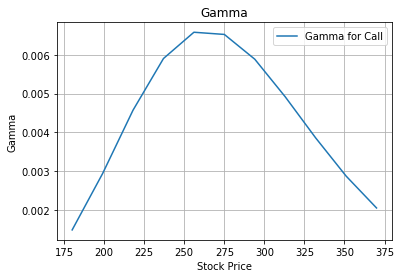

In [69]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [104]:
d = gamma(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 0.0064 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.0064 .


# Rho
Rho, ρ, measure the sensitivity of the option to changes in the interest rate. it is the derivative of the option value with respect to the risk-free interest rate.

In [36]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [37]:
rho(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call') #value of rho

123.57621820710486

In [80]:
S = np.linspace(180, 370, 21) #plotting the 3d graph of rho
T = np.linspace(0.5, 2, 21)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 286, T[i], 0.0155, 0.0075, 0.2204, 'call')



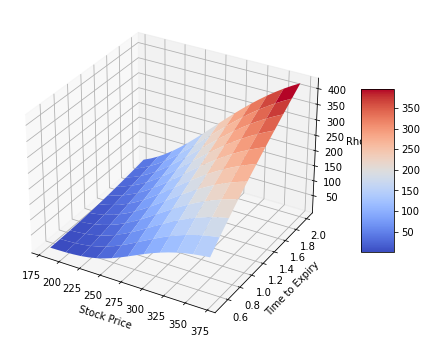

In [81]:
fig = plt.figure(figsize=(10, 6))  #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [82]:
r = np.linspace(0,0.1,11)  #plotting the 2d graph
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(281, 286, 1, r[i], 0.0075, 0.2204, 'call')

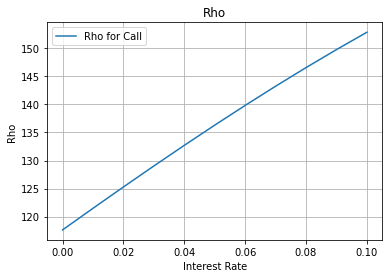

In [83]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

In [101]:
r = rho(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', r.round(4)*0.01, '.')

The value of Rho is 123.5762 . If the interest rate increases 1%, then the value of the option will increase $ 1.235762 .


# Vega
Vega measures sensitivity of the option to changes in volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset

In [40]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [41]:
vega(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')  #value of vega

111.01959519341393

In [84]:
S = np.linspace(180, 370, 21) #plotting the 3d graph
T = np.linspace(0.5, 2, 31)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 286, T[i], 0.0155, 0.0075, 0.2204, 'call')

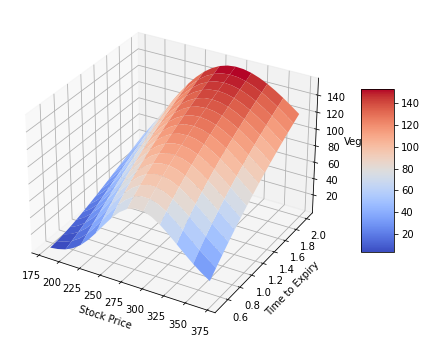

In [85]:
fig = plt.figure(figsize=(10, 6)) #dimensins of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [ ]:
# vol = np.linspace(0.1,0.3,11)    #plotting the 2d graph
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(281, 286, 1, 0.0155, 0.0075, vol[i], 'call')

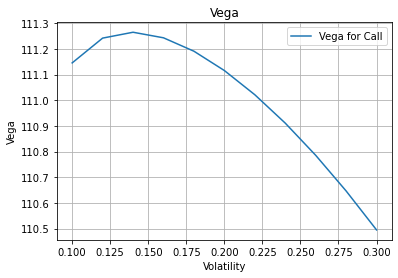

In [87]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

In [97]:
v = vega(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 111.0196 . If the volatility increases 1%, then the value of the option will increase $ 1.110196 .


# Theta
Theta, θ, measures the sensitivity of the value of the derivative to the changes in the time to expiration 

In [88]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [89]:
theta(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call') #value of theta 

13.04848310107792

In [91]:
S = np.linspace(180, 370, 21)  #plotting the 3d graph
T = np.linspace(0.5, 2, 21)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 286, T[i], 0.0155, 0.0075, 0.2204, 'call')

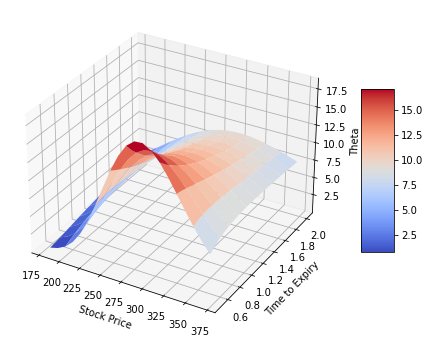

In [92]:
fig = plt.figure(figsize=(10, 6))    #dimensions of thr graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [94]:
T = np.linspace(0.25,3,12)   #plotting the 2d graph
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(281, 286, T[i], 0.0155, 0.0075, 0.2204, 'call')


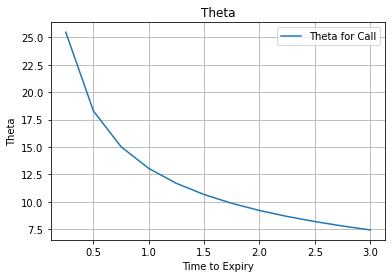

In [95]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

In [102]:
t = theta(281, 286, 1, 0.0155, 0.0075, 0.2204, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')

The value of Theta is 13.0485 . If the time increases 1 year, then the value of the option will increase $ 0.13048500000000002 .
